In [1]:
# Loading required Libraries

import pandas as pd
import numpy as np

In [2]:
# Loading the dataset and displaying the first 5 rows

df = pd.read_csv('BikeCrash.csv')
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,Main/Proper Lane,45,Dry,Marked Lanes,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
3,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,Main/Proper Lane,45,Dry,None,Not Worn


# Understanding the dataset

In [3]:
# Checking the shape of the dataset

df.shape

(2463, 16)

The dataset contains a total of 2463 rows and 16 columns

In [4]:
# Checking the Null Values

df.isna().sum()

$1000 Damage to Any One Person's Property    0
Active School Zone Flag                      0
At Intersection Flag                         0
Average Daily Traffic Amount                 0
Construction Zone Flag                       0
Crash Severity                               0
Crash Time                                   0
Crash Total Injury Count                     0
Crash Year                                   0
Day of Week                                  0
Intersection Related                         0
Roadway Part                                 0
Speed Limit                                  0
Surface Condition                            0
Traffic Control Type                         0
Person Helmet                                0
dtype: int64

This dataset is not having any null values present in it. The data is present in each cell, however it might not be in correct format.

In [5]:
# Checking the datatypes of the variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  2463 non-null   object
 1   Active School Zone Flag                    2463 non-null   object
 2   At Intersection Flag                       2463 non-null   bool  
 3   Average Daily Traffic Amount               2463 non-null   object
 4   Construction Zone Flag                     2463 non-null   object
 5   Crash Severity                             2463 non-null   object
 6   Crash Time                                 2463 non-null   int64 
 7   Crash Total Injury Count                   2463 non-null   int64 
 8   Crash Year                                 2463 non-null   int64 
 9   Day of Week                                2463 non-null   object
 10  Intersection Related                

From the above result we can observe that couple of variables are having different datatype than what was expected

In [6]:
df['Average Daily Traffic Amount'].unique()  # Column value as 'No Data' is present which is similar to NULL

array(['15262', 'No Data', '22775', '34215', '160919', '44866', '115456',
       '33647', '123443', '124466', '20895', '21351', '148494', '125081',
       '49417', '44197', '197636', '52925', '124047', '164391', '29839',
       '154266', '124527', '54574', '29304', '14685', '30932', '25507',
       '118604', '50813', '179906', '34390', '162940', '41709', '87161',
       '10943', '56417', '105589', '103160', '15613', '136130', '24711',
       '113017', '37593', '38439', '39107', '26658', '29344', '52868',
       '4300', '118676', '23804', '22613', '35009', '174473', '172066',
       '25436', '122507', '55791', '130691', '180878', '20818', '22725',
       '139928', '51598', '106597', '27085', '25860', '69369', '34328',
       '64902', '18049', '25277', '68363', '142526', '116198', '118571',
       '25921', '46918', '49720', '141120'], dtype=object)

In [7]:
df['Crash Severity'].unique()   # Unique values for Crash Severity

array(['Incapacitating Injury', 'Non-Incapacitating Injury',
       'Possible Injury', 'Not Injured', 'Killed'], dtype=object)

In [8]:
df['Crash Time'].unique()  # this is supposed to be a time data in 24-hour format

array([ 239,  310, 2300, 1408, 1715, 1826, 2104, 1814, 1124, 1605, 1739,
       1435, 1618,  439, 1742, 1651,  722,  758, 1658, 1315, 1216, 1945,
       1126, 1840, 1152, 1543, 1654,  650,  230, 1734, 1541, 1420, 1737,
       1136,  608, 1325, 2326, 2025, 1140, 2123, 1753,  227, 1934, 1711,
       2045, 1442,  107, 1621, 2129, 2115, 1623, 1112, 1800, 1831, 1903,
       1732,  448,  916,  104,  949,  106,  837, 1402,  851, 1359, 1722,
        919, 1643,  940, 1941, 1154, 1813, 1239, 1825, 1300, 2120, 1627,
       1130, 1538, 1240, 1650, 2205, 1736, 1545, 2119, 1404, 1600,  844,
       1337, 1644, 1900, 2042,  400, 1206, 1153, 1201, 1851, 1455, 1927,
       1629, 2339, 2138,   37,  307, 1743, 1029, 1256, 1051,  231,  709,
       1929, 2136, 1642, 1827,  812,  939, 1514, 1915,  235, 1922, 1052,
       1920, 1203, 1040, 2349,  854, 1217, 1255,  750, 1324, 2118, 2107,
       1833,  715, 1339, 2250, 1449, 1210, 1727,  253, 1720,  738,  148,
        225, 2055,  725, 1427, 2238, 1805, 2032, 12

In [9]:
df['Crash Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

__Crashes has been recorded from year 2010 to 2017__

In [10]:
df['Intersection Related'].unique()

array(['Non Intersection', 'Intersection Related', 'Driveway Access',
       'Intersection', 'Not Reported'], dtype=object)

In [11]:
df['Roadway Part'].unique()

array(['Main/Proper Lane', 'Service/Frontage Road',
       'Other (Explain In Narrative)', 'Entrance/On Ramp'], dtype=object)

In [12]:
sorted(df['Speed Limit'].unique())   # -1 is a possible incorrect value

[-1, 0, 5, 10, 15, 20, 25, 30, 32, 35, 36, 40, 45, 50, 55, 60, 65]

In [13]:
df['Person Helmet'].unique()

array(['Worn, Damaged', 'Not Worn', 'Worn, Unk Damage', 'Unknown If Worn',
       'Worn, Not Damaged'], dtype=object)

# Data Cleaning

In [14]:
# Imputing mean value where 'Average Daily Traffic Amount' is 'No Data'

df.loc[df['Average Daily Traffic Amount'] == 'No Data', 'Average Daily Traffic Amount'] = np.nan
df['Average Daily Traffic Amount'] = df['Average Daily Traffic Amount'].astype(float)
df['Average Daily Traffic Amount'].fillna(df['Average Daily Traffic Amount'].median(), inplace = True)

In [15]:
df.describe()

,Average Daily Traffic Amount,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit
count,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,43053.683719,1404.700771,1.092164,2013.403979,26.410881
std,23693.279111,558.967560,1.208230,2.248480,17.005282
min,4300.000000,1.000000,0.000000,2010.000000,-1.000000
25%,38439.000000,1008.000000,1.000000,2011.000000,0.000000
50%,38439.000000,1532.000000,1.000000,2013.000000,30.000000
75%,38439.000000,1822.500000,1.000000,2015.000000,35.000000
max,197636.000000,2358.000000,15.000000,2017.000000,65.000000


In [16]:
df.loc[df['Speed Limit'] == -1,'Speed Limit'] = 0

In [17]:
df[df['Speed Limit'] == 0]

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet
5,No,No,True,38439.0,No,Non-Incapacitating Injury,1408,1,2010,Wednesday,Driveway Access,Main/Proper Lane,0,Wet,Signal Light,Not Worn
13,No,No,False,38439.0,No,Non-Incapacitating Injury,1435,1,2010,Wednesday,Driveway Access,Other (Explain In Narrative),0,Dry,Stop Sign,Not Worn
21,No,No,True,38439.0,No,Non-Incapacitating Injury,1315,1,2010,Saturday,Intersection,Main/Proper Lane,0,Dry,Signal Light,Not Worn
39,No,No,True,38439.0,No,Non-Incapacitating Injury,1325,1,2010,Tuesday,Intersection,Main/Proper Lane,0,Dry,Stop Sign,"Worn, Unk Damage"
43,No,No,False,38439.0,No,Possible Injury,2123,1,2010,Monday,Non Intersection,Main/Proper Lane,0,Unknown,None,Not Worn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,No,No,True,29839.0,No,Non-Incapacitating Injury,2038,1,2017,Tuesday,Intersection Related,Main/Proper Lane,0,Dry,Stop Sign,Not Worn
2449,No,No,True,38439.0,No,Possible Injury,1935,1,2017,Friday,Intersection,Main/Proper Lane,0,Dry,None,Not Worn
2454,Yes,No,True,38439.0,No,Possible Injury,1732,1,2017,Thursday,Intersection Related,Main/Proper Lane,0,Dry,None,"Worn, Not Damaged"
2459,No,No,True,38439.0,No,Non-Incapacitating Injury,2048,1,2017,Tuesday,Non Intersection,Main/Proper Lane,0,Dry,Center Stripe/Divider,Not Worn


# Data Preparation for Classification

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df_new = df
cat_var = df_new.columns[df_new.dtypes == object]
bool_var = df_new.columns[df_new.dtypes == bool]
df_new[cat_var] = df_new[cat_var].apply(le.fit_transform)
df_new[bool_var] = df_new[bool_var].apply(le.fit_transform)

In [20]:
df_new.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet
0,0,0,0,15262.0,0,0,239,1,2010,0,3,1,45,0,6,2
1,0,0,0,38439.0,0,2,310,2,2010,0,3,1,35,0,1,0
2,0,0,0,38439.0,0,2,310,2,2010,0,3,1,35,0,1,0
3,0,0,0,38439.0,0,2,310,2,2010,0,3,1,35,0,1,0
4,0,0,0,22775.0,0,2,2300,1,2010,1,2,1,45,0,8,0


In [21]:
X = df_new.drop('Crash Severity', axis=1)
y = df_new['Crash Severity']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =0.20, random_state=3)

# LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

lr_model = LogisticRegression()

In [24]:
lr_model.fit(X_train,y_train)

/Users/amrytapanda/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
lr_prediction = lr_model.predict(X_test)

In [26]:
lr_model.score(X_test, y_test)

0.6348884381338742

<AxesSubplot:>

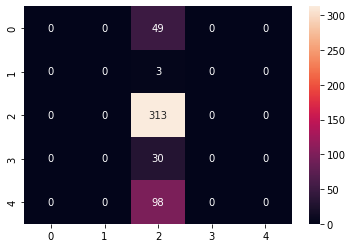

In [27]:
import seaborn as sns
cm = confusion_matrix(y_test, lr_prediction)
sns.heatmap(cm, annot=True, fmt = 'g')

In [28]:
lr_importance = lr_model.coef_[0]

In [29]:
for i,v in enumerate(lr_importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.00041
Feature: 6, Score: 0.00001
Feature: 7, Score: -0.00024
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00001
Feature: 13, Score: -0.00000
Feature: 14, Score: -0.00000


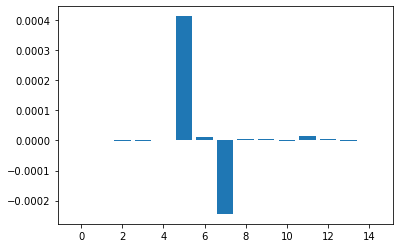

In [30]:
plt.bar([x for x in range(len(lr_importance))], lr_importance)
plt.show()

# DECISION TREE CLASSIFICATION

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtree_model =  DecisionTreeClassifier(max_depth=4)

In [32]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [33]:
dtree_predict = dtree_model.predict(X_test)

In [34]:
dtree_model.score(X_test,y_test)

0.6937119675456389

In [35]:
dt_importance = dtree_model.feature_importances_

In [36]:
for i,v in enumerate(dt_importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.00703
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01948
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.08930
Feature: 6, Score: 0.87712
Feature: 7, Score: 0.00708
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000


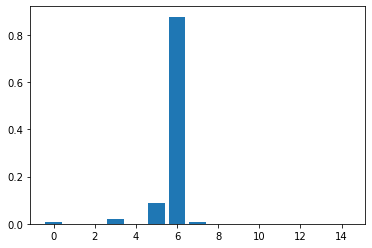

In [37]:
plt.bar([x for x in range(len(dt_importance))], dt_importance)
plt.show()

# RANDOM FOREST CLASSIFICATION

In [38]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=5000, max_depth=4)

In [39]:
rc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=5000)

In [40]:
rc_predict = rc.predict(X_test)

In [41]:
rc.score(X_test, y_test)

0.6977687626774848

In [42]:
rc_importance = rc.feature_importances_
for i,v in enumerate(rc_importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.03467
Feature: 1, Score: 0.00094
Feature: 2, Score: 0.00764
Feature: 3, Score: 0.03807
Feature: 4, Score: 0.00176
Feature: 5, Score: 0.08912
Feature: 6, Score: 0.61327
Feature: 7, Score: 0.03581
Feature: 8, Score: 0.02662
Feature: 9, Score: 0.03518
Feature: 10, Score: 0.01538
Feature: 11, Score: 0.02549
Feature: 12, Score: 0.03215
Feature: 13, Score: 0.02378
Feature: 14, Score: 0.02011


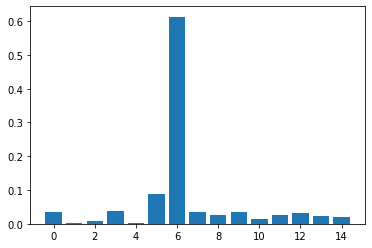

In [43]:
plt.bar([x for x in range(len(rc_importance))], rc_importance)
plt.show()